We want to test what kinds of things affect the polariton frequencies as a sanity check to the results from the tripartite calculations.  We really don't care about the cavity spectrum or anything like that here.

## Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
# Set font size of plot elements"
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Functions

In [3]:
def get_polariton_freq(κ, γ, Δ, g, r, Ω, gy, χ):
    """
    function for calculating the polariton frequencies given a set of experimental parameters
    :param ω:  the frequency
    :param κ:  the output coupling rate of the cavity
    :param γ:  the internal loss rate of the cavity
    :param Δ:  the detuning between the NV ensemble and the cavity mode
    :param g:  the cooperativity of the NV ensemble and the cavity
    :param r:  the damping rate of the NV ensemble
    :param Ω:  the detuning between the YIG and the cavity
    :param gy: the cooperativity between the YIG and the cavity
    :param χ:  the damping rate of the YIG
    :return:   the polariton frequencies obtained by calculating the eigenvalues of the matrix in Eq. 68 in my notes
    """
    # Define the matrix
    M = np.zeros((3, 3), dtype=complex)
    temp = [
         [(κ + γ) / 2 + 1j*Δ, 1j * g, -1j * gy],
         [1j * g, r / 2, 0],
         [-1j * gy, 0, χ / 2 + 1j*Ω]
        ]
    
    #for i in range(len(temp)):
    #    for j in range(len(temp[i])):
    #        M[i][j] = temp[i][j]

    # Calculate the eigenvalues
    eig = linalg.eigvals(np.array(temp))

    # return
    return np.sort(eig * 1j) * -1j

In [4]:
def get_nv_polariton_freq(κ, γ, Δ, g, r):
    """
    function for calculating the polariton frequencies given a set of experimental parameters
    :param ω:  the frequency
    :param κ:  the output coupling rate of the cavity
    :param γ:  the internal loss rate of the cavity
    :param Δ:  the detuning between the NV ensemble and the cavity mode
    :param g:  the cooperativity of the NV ensemble and the cavity
    :param r:  the damping rate of the NV ensemble
    :return:   the eigenvalues
    """
    M = [
        [(κ + γ) / 2 + 1j*Δ, 1j * g],
        [1j * g, r / 2]
    ]
    M = np.array(M)

    eigs = linalg.eigvals(M)

    return np.sort(eigs * 1j) * -1j

## NV ensemble only
### a) Sweep over g

In [5]:
# Define constant parameters  
ωc = 2 * np.pi * 2.87e9  # Hz
κ = 1e5
γ = 1e5

In [6]:
# Define g values
g = np.logspace(5, 8, 1000)
r = g.copy()

In [7]:
# Create arrays to store values
pol_a_freqs = np.zeros(g.shape[0], dtype=complex)
pol_b_freqs = np.zeros(g.shape[0], dtype=complex)
for i in range(g.shape[0]):
    temp = get_nv_polariton_freq(κ, γ, 0, g[i], r[i],)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]

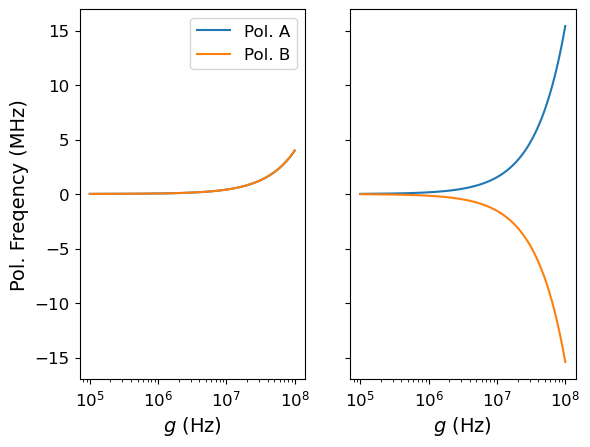

In [8]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(g, pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(g, pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(g, pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(g, pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[0].set_xlabel("$g$ (Hz)")
ax[1].set_xlabel("$g$ (Hz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].legend()

### b) $\Delta$ sweep

In [9]:
# Set g to a fixed value
g = 1e6
r = g

In [10]:
# Set up Δ values
Δ = np.linspace(-4, 4, 1000) * 2 * np.pi * 1e6

In [11]:
# Create arrays to store values
pol_a_freqs = np.zeros(Δ.shape[0], dtype=complex)
pol_b_freqs = np.zeros(Δ.shape[0], dtype=complex)
for i in range(Δ.shape[0]):
    temp = get_nv_polariton_freq(κ, γ, Δ[i], g, r,)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]

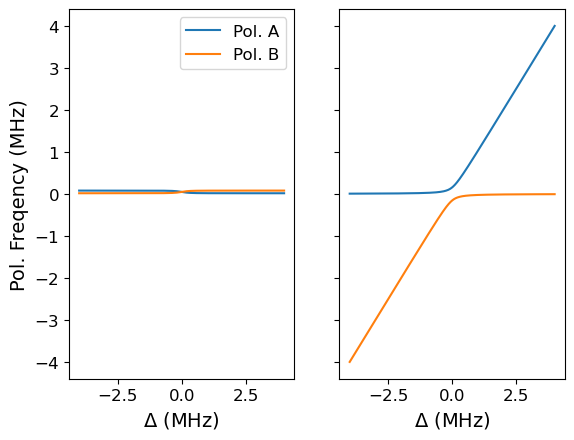

In [12]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[0].set_xlabel("$\\Delta$ (MHz)")
ax[1].set_xlabel("$\\Delta$ (MHz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].legend()

### c) What if $\kappa = \gamma = 0$?

In [13]:
# Set γ and κ
κ = 0
γ = 0

In [14]:
# First we'll sweep over g
g = np.logspace(5, 8, 1000)
r = g.copy()

In [15]:
# Create arrays to store values
pol_a_freqs = np.zeros(g.shape[0], dtype=complex)
pol_b_freqs = np.zeros(g.shape[0], dtype=complex)
for i in range(g.shape[0]):
    temp = get_nv_polariton_freq(κ, γ, 0, g[i], r[i],)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]

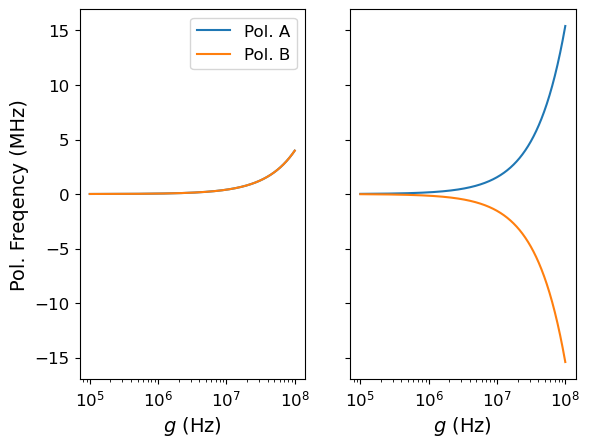

In [16]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(g, pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(g, pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(g, pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(g, pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[0].set_xlabel("$g$ (Hz)")
ax[1].set_xlabel("$g$ (Hz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].legend()

In [17]:
# Now sweep over Δ
# Set g to a fixed value
g = 1e6
r = g

# Set up Δ values
Δ = np.linspace(-4, 4, 1000) * 2 * np.pi * 1e6

In [18]:
# Create arrays to store values
pol_a_freqs = np.zeros(Δ.shape[0], dtype=complex)
pol_b_freqs = np.zeros(Δ.shape[0], dtype=complex)
for i in range(Δ.shape[0]):
    temp = get_nv_polariton_freq(κ, γ, Δ[i], g, r,)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]

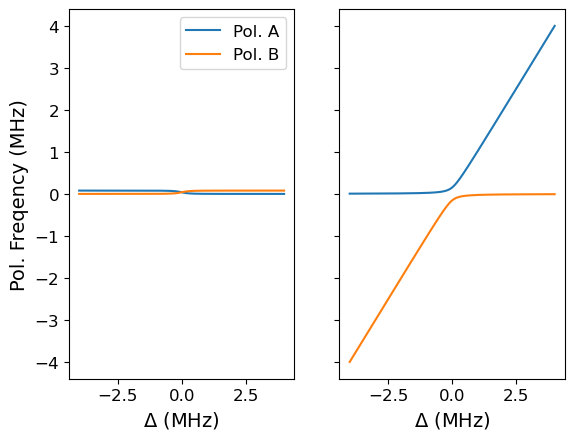

In [19]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[0].set_xlabel("$\\Delta$ (MHz)")
ax[1].set_xlabel("$\\Delta$ (MHz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].legend()

## Tripartite System

### a) Sweep over $g_y$

In [20]:
# Define constant parameters  
ωc = 2 * np.pi * 2.87e9  # Hz
κ = 1e5
γ = 1e5
g = 1e6
r = 0

In [21]:
# Set up values for gy sweep
gy = np.logspace(5, 8, 1000)
χ = gy.copy()

In [22]:
# Create arrays to store values
pol_a_freqs = np.zeros(gy.shape[0], dtype=complex)
pol_b_freqs = np.zeros(gy.shape[0], dtype=complex)
pol_c_freqs = np.zeros(gy.shape[0], dtype=complex)
for i in range(gy.shape[0]):
    temp = get_polariton_freq(κ, γ, 0, g, r, 0, gy[i], χ[i])
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]
    pol_c_freqs[i] = temp[2]

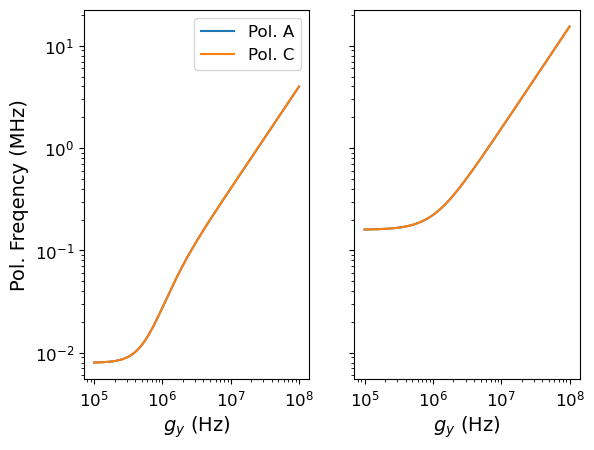

In [26]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(gy, pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
#ax[0].plot(gy, pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[0].plot(gy, np.abs(pol_c_freqs.real) / (2 * np.pi * 1e6), label='Pol. C')
ax[1].plot(gy, pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
#ax[1].plot(gy, pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(gy, np.abs(pol_c_freqs.imag) / (2 * np.pi * 1e6), label='Pol. C')
ax[0].set_xlabel("$g_y$ (Hz)")
ax[1].set_xlabel("$g_y$ (Hz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()

### b) Sweep over $g$

In [26]:
# Set gy
gy = 1e7
χ = 0

In [27]:
# Set up values for g sweep
g = np.logspace(5, 8, 1000)
r = 0

In [28]:
# Create arrays to store values
pol_a_freqs = np.zeros(g.shape[0], dtype=complex)
pol_b_freqs = np.zeros(g.shape[0], dtype=complex)
pol_c_freqs = np.zeros(g.shape[0], dtype=complex)
for i in range(g.shape[0]):
    temp = get_polariton_freq(κ, γ, 0, g[i], 0, 0, gy, χ)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]
    pol_c_freqs[i] = temp[2]

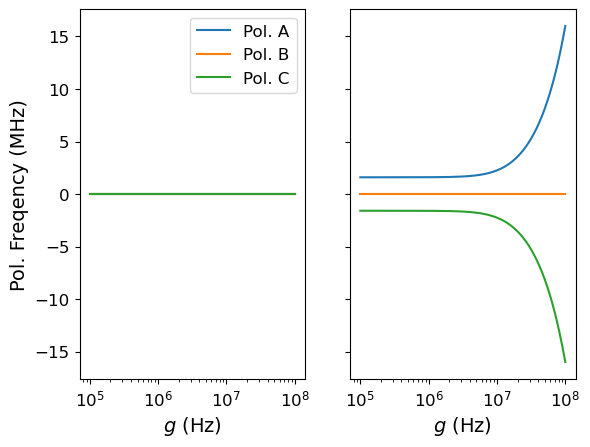

In [29]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(g, pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(g, pol_b_freqs.real / (2 * np.pi * 1e6), label='Pol. B')
ax[0].plot(g, pol_c_freqs.real / (2 * np.pi * 1e6), label='Pol. C')
ax[1].plot(g, pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(g, pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(g, pol_c_freqs.imag / (2 * np.pi * 1e6), label='Pol. C')
ax[0].set_xlabel("$g$ (Hz)")
ax[1].set_xlabel("$g$ (Hz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].legend()

### c) Sweep over $\Delta$

In [30]:
# Set g to a fixed value
g = 1e6
r = 0

In [31]:
# Set up Δ values
Δ = np.linspace(-4, 4, 1000) * 2 * np.pi * 1e6

In [32]:
# Create arrays to store values
pol_a_freqs = np.zeros(Δ.shape[0], dtype=complex)
pol_b_freqs = np.zeros(Δ.shape[0], dtype=complex)
pol_c_freqs = np.zeros(Δ.shape[0], dtype=complex)
for i in range(Δ.shape[0]):
    temp = get_polariton_freq(κ, γ, Δ[i], g, 0, 0, gy, 0)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]
    pol_c_freqs[i] = temp[2]

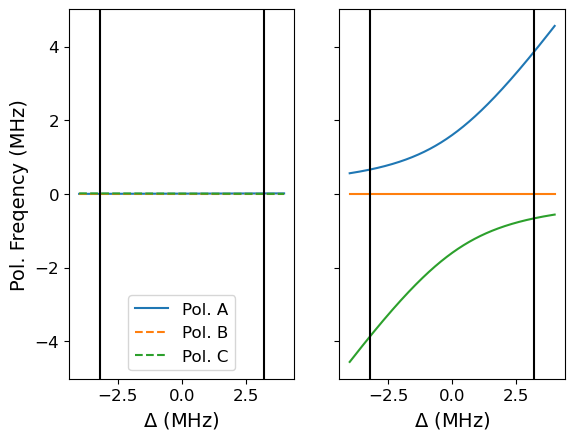

In [33]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.real / (2 * np.pi * 1e6), '--', label='Pol. B')
ax[0].plot(Δ / (2 * np.pi * 1e6), pol_c_freqs.real / (2 * np.pi * 1e6), '--', label='Pol. C')
#ax[0].axvline(x=2*np.sqrt(g**2 + gy**2) / (2 * np.pi * 1e6), color='k')
#ax[0].axvline(x=-2*np.sqrt(g**2 + gy**2) / (2 * np.pi * 1e6), color='k')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(Δ / (2 * np.pi * 1e6), pol_c_freqs.imag / (2 * np.pi * 1e6), label='Pol. C')
#ax[1].axvline(x=2*np.sqrt(g**2 + gy**2) / (2 * np.pi * 1e6), color='k')
#ax[1].axvline(x=-2*np.sqrt(g**2 + gy**2) / (2 * np.pi * 1e6), color='k')
ax[0].set_xlabel("$\\Delta$ (MHz)")
ax[1].set_xlabel("$\\Delta$ (MHz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].legend()

### d) Sweep over $\Omega$

In [34]:
# Set Δ = 0
Δ = 0

In [35]:
# Set up Ω values
Ω = np.linspace(-4, 4, 1000) * 2 * np.pi * 1e6

In [36]:
# Create arrays to store values
pol_a_freqs = np.zeros(Ω.shape[0], dtype=complex)
pol_b_freqs = np.zeros(Ω.shape[0], dtype=complex)
pol_c_freqs = np.zeros(Ω.shape[0], dtype=complex)
for i in range(Ω.shape[0]):
    temp = get_polariton_freq(κ, γ, 0, g, 0, Ω[i], gy, 0)
    pol_a_freqs[i] = temp[0]
    pol_b_freqs[i] = temp[1]
    pol_c_freqs[i] = temp[2]

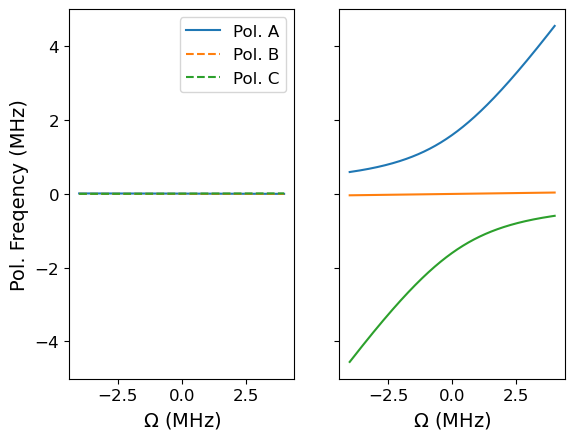

In [37]:
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharey='all')
ax[0].plot(Ω / (2 * np.pi * 1e6), pol_a_freqs.real / (2 * np.pi * 1e6), label='Pol. A')
ax[0].plot(Ω / (2 * np.pi * 1e6), pol_b_freqs.real / (2 * np.pi * 1e6), '--', label='Pol. B')
ax[0].plot(Ω / (2 * np.pi * 1e6), pol_c_freqs.real / (2 * np.pi * 1e6), '--', label='Pol. C')
ax[1].plot(Ω / (2 * np.pi * 1e6), pol_a_freqs.imag / (2 * np.pi * 1e6), label='Pol. A')
ax[1].plot(Ω / (2 * np.pi * 1e6), pol_b_freqs.imag / (2 * np.pi * 1e6), label='Pol. B')
ax[1].plot(Ω / (2 * np.pi * 1e6), pol_c_freqs.imag / (2 * np.pi * 1e6), label='Pol. C')
ax[0].set_xlabel("$\\Omega$ (MHz)")
ax[1].set_xlabel("$\\Omega$ (MHz)")
ax[0].set_ylabel("Pol. Freqency (MHz)")
ax[0].legend()

## Sympy

Want to try using sympy to evaluate when the eigenvalues are complex or real

In [38]:
import sympy as sym

In [39]:
# Define symbols that we'll be using
κ, γ, g, gy, r, χ, Δ, Ω = sym.symbols('κ, γ, g, gy, r, χ, Δ, Ω')

### a) $\Delta$ = $\Omega$ = 0

It seems that setting the damping rates to 0 doesn't really change the eigenvalues, so we'll set them to 0 to simplify things for now

In [40]:
M = sym.Matrix([[0, 1j*g, -1j*gy],
                [1j*g, 0, 0],
                [-1j*gy, 0, 0]])

In [41]:
eigs = M.eigenvals()

In [42]:
for _ in eigs:
    print(sym.simplify(_))

-1.0*sqrt(-g**2 - gy**2)
1.0*sqrt(-g**2 - gy**2)
0


### b) $\Delta \neq 0$, $\Omega = 0$ 

In [43]:
M = sym.Matrix([[1j*Δ, 1j*g, -1j*gy],
                [1j*g, 0, 0],
                [-1j*gy, 0, 0]])

In [44]:
eigs = M.eigenvals()

In [45]:
for _ in eigs:
    print(sym.simplify(_))

0.5*I*Δ - 1.0*sqrt(-1.0*g**2 - 1.0*gy**2 - 0.25*Δ**2)
0.5*I*Δ + 1.0*sqrt(-1.0*g**2 - 1.0*gy**2 - 0.25*Δ**2)
0


### c) $\Delta = 0$, $\Omega \neq 0$ 

In [46]:
M = sym.Matrix([[0, 1j*g, -1j*gy],
                [1j*g, 0, 0],
                [-1j*gy, 0, 1j*Ω]])

In [47]:
eigs = M.eigenvals()

In [48]:
for _ in eigs:
    print(sym.simplify(_))
    print("")

(0.419973683298291*g**2 + 0.419973683298291*gy**2 + 0.139991227766097*Ω**2 + (0.333333333333333*I*Ω - 0.7937005259841*(-I*g**2*Ω + 0.0740740740740741*I*Ω**3 + 0.333333333333333*I*Ω*(g**2 + gy**2) + 0.666666666666667*sqrt(-Ω**2*(-g**2 + 0.5*gy**2 + 0.111111111111111*Ω**2)**2 + 0.333333333333333*(g**2 + gy**2 + 0.333333333333333*Ω**2)**3))**(1/3))*(-I*g**2*Ω + 0.0740740740740741*I*Ω**3 + 0.333333333333333*I*Ω*(g**2 + gy**2) + 0.666666666666667*sqrt(-Ω**2*(-g**2 + 0.5*gy**2 + 0.111111111111111*Ω**2)**2 + 0.333333333333333*(g**2 + gy**2 + 0.333333333333333*Ω**2)**3))**(1/3))/(-I*g**2*Ω + 0.0740740740740741*I*Ω**3 + 0.333333333333333*I*Ω*(g**2 + gy**2) + 0.666666666666667*sqrt(-Ω**2*(-g**2 + 0.5*gy**2 + 0.111111111111111*Ω**2)**2 + 0.333333333333333*(g**2 + gy**2 + 0.333333333333333*Ω**2)**3))**(1/3)

(-0.839947366596582*g**2 - 0.839947366596582*gy**2 - 0.279982455532194*Ω**2 + (1 - sqrt(3)*I)*(0.333333333333333*I*Ω + 0.39685026299205*(1 - sqrt(3)*I)*(-I*g**2*Ω + 0.0740740740740741*I*Ω**3 +